<a href="https://colab.research.google.com/github/Cing2PO/Clustering/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rizki_Ahmad_Gufron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd #dataframe
import numpy as np #olah angka
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
from scipy.stats import zscore #mencari outlier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import math
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Sumber dataset yang digunakan : https://www.kaggle.com/datasets/rajkumardubey10/all-top-rated-imdb-movies-dataset

In [ ]:
url = 'https://raw.githubusercontent.com/Cing2PO/Clustering/refs/heads/main/dataset/Top_rated_movies1.csv'
df = pd.read_csv(url)
df['release_year'] = (pd.to_datetime(df['release_date']).dt.year).astype('object')
df.head()

,id,title,overview,popularity,release_date,vote_average,vote_count,release_year
0,168705,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,2005-10-22,4.105,501,2005
1,19766,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,2003-03-11,4.100,342,2003
2,248705,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,2016-03-23,4.090,636,2016
3,17711,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,2000-06-30,4.075,335,2000
4,580,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,1987-07-17,4.064,931,1987


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur Data

In [ ]:
# Mengecek jumlah baris saja
print(f"Jumlah baris: {df.shape[0]}")

# Mengecek jumlah kolom saja
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 8831
Jumlah kolom: 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8831 non-null   int64  
 1   title         8831 non-null   object 
 2   overview      8830 non-null   object 
 3   popularity    8831 non-null   float64
 4   release_date  8831 non-null   object 
 5   vote_average  8831 non-null   float64
 6   vote_count    8831 non-null   int64  
 7   release_year  8831 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 552.1+ KB


## Data yang hilang

In [ ]:
#cek nilai yang kosong pada dataset
def cek_nilai_kosong(dataset):
  for col in dataset.columns:
      nan_count = dataset[col].isna().sum()
      print(f"Kolom '{col}' memiliki {nan_count} nilai kosong.")

cek_nilai_kosong(df)

Kolom 'id' memiliki 0 nilai kosong.
Kolom 'title' memiliki 0 nilai kosong.
Kolom 'overview' memiliki 1 nilai kosong.
Kolom 'popularity' memiliki 0 nilai kosong.
Kolom 'release_date' memiliki 0 nilai kosong.
Kolom 'vote_average' memiliki 0 nilai kosong.
Kolom 'vote_count' memiliki 0 nilai kosong.
Kolom 'release_year' memiliki 0 nilai kosong.


## Analisis Distribusi dan Korelasi

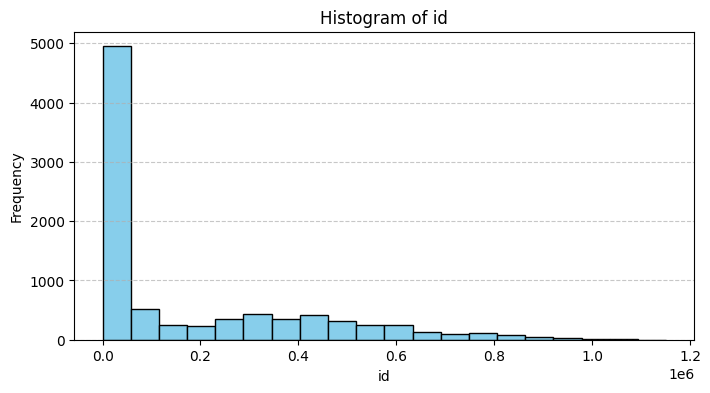

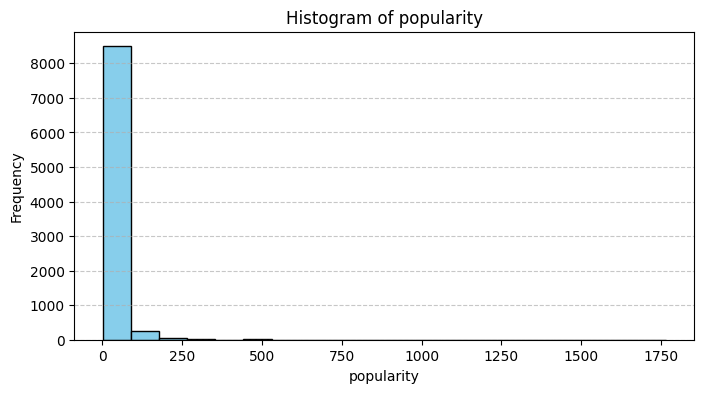

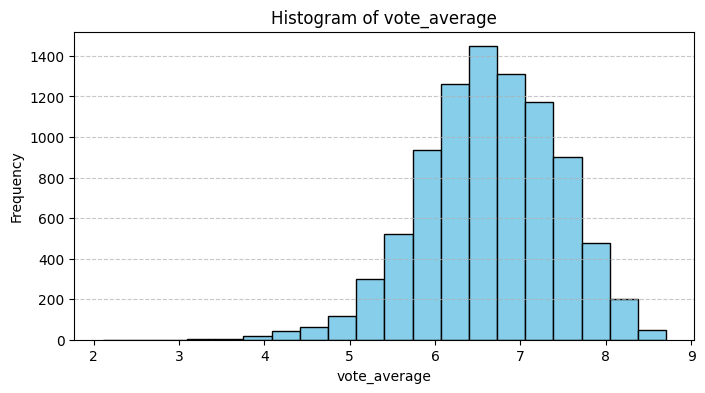

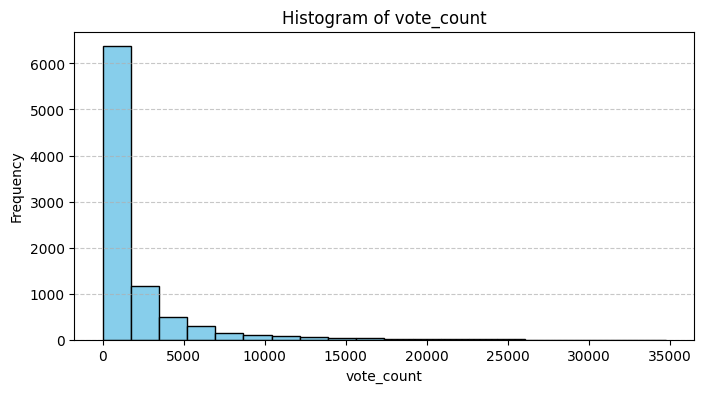

In [ ]:
# Memilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['number'])

# Membuat histogram untuk setiap kolom numerik
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

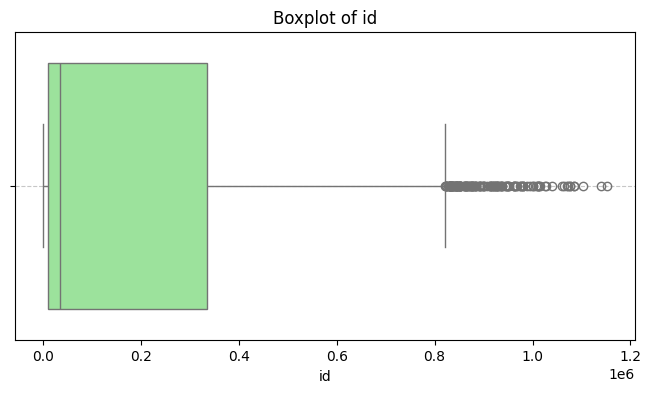

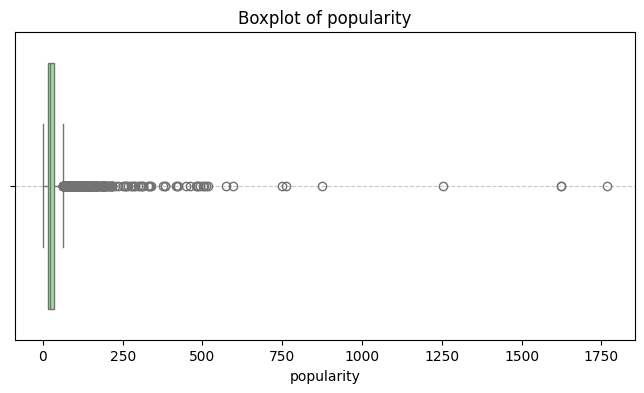

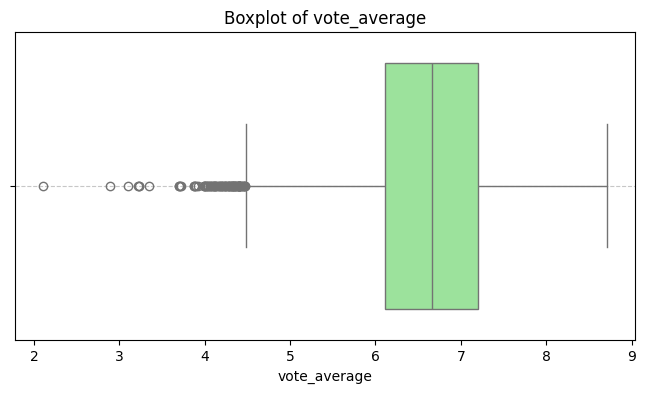

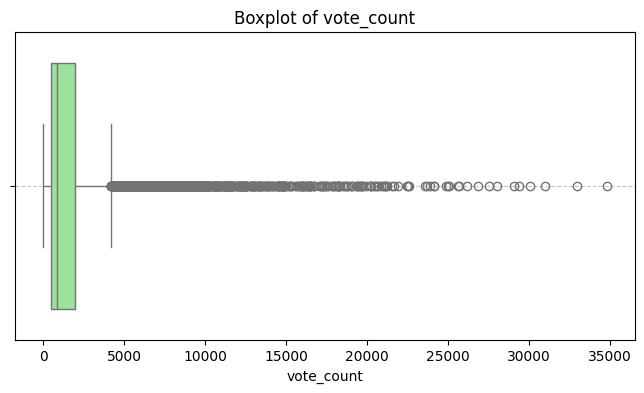

In [ ]:
# Membuat boxplot untuk setiap kolom numerik
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

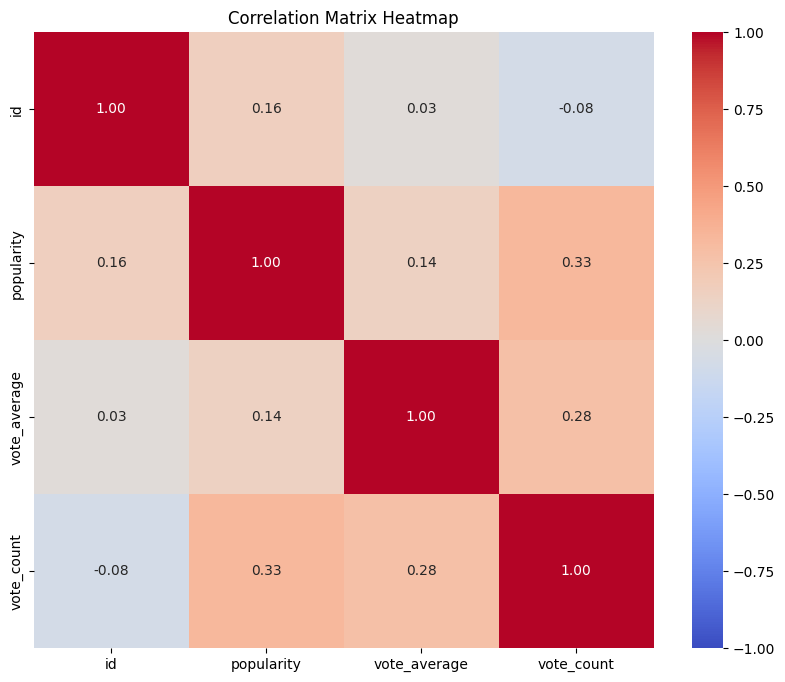

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = numerical_columns.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Visualisasi Data

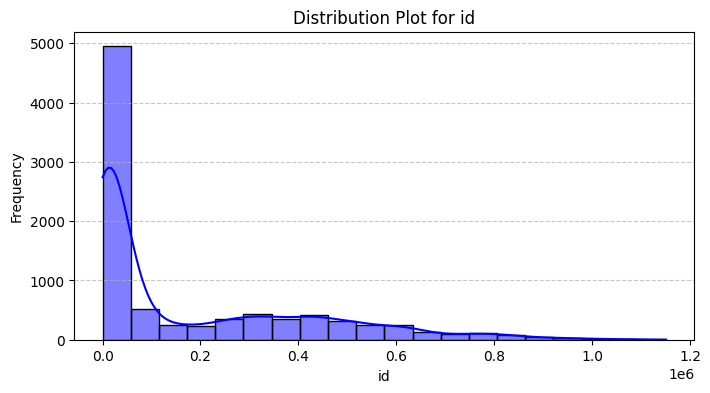

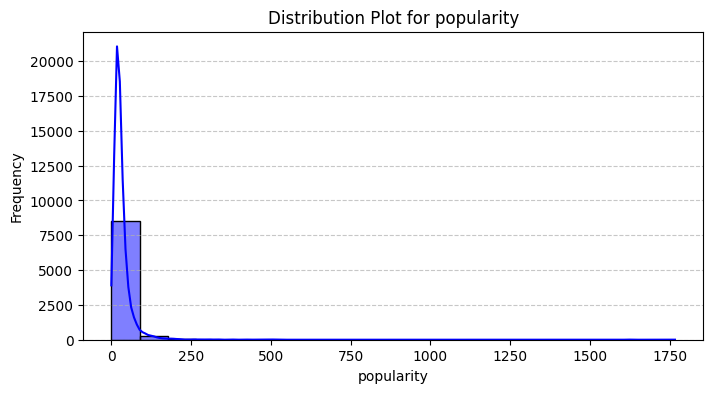

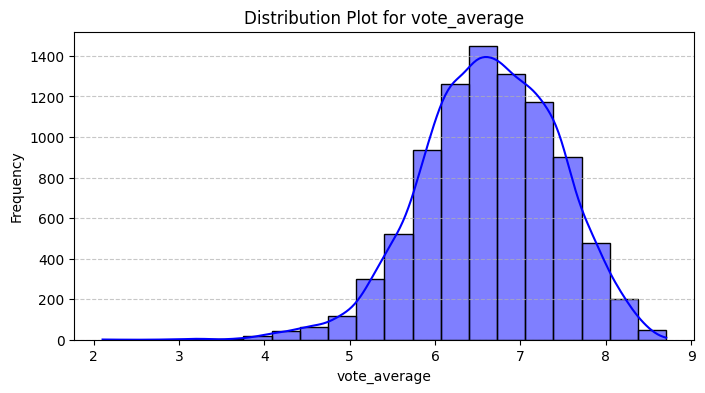

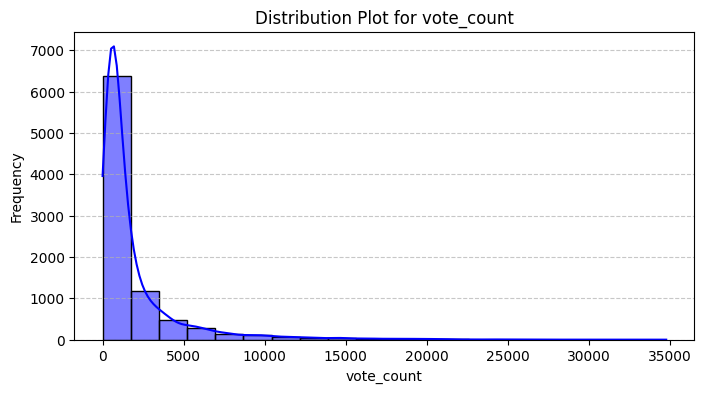

In [ ]:
# Memilih kolom numerik
numerical_columns = df.select_dtypes(include=['number'])

# Membuat grafik distribusi
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<ipython-input-194-d269be2495cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


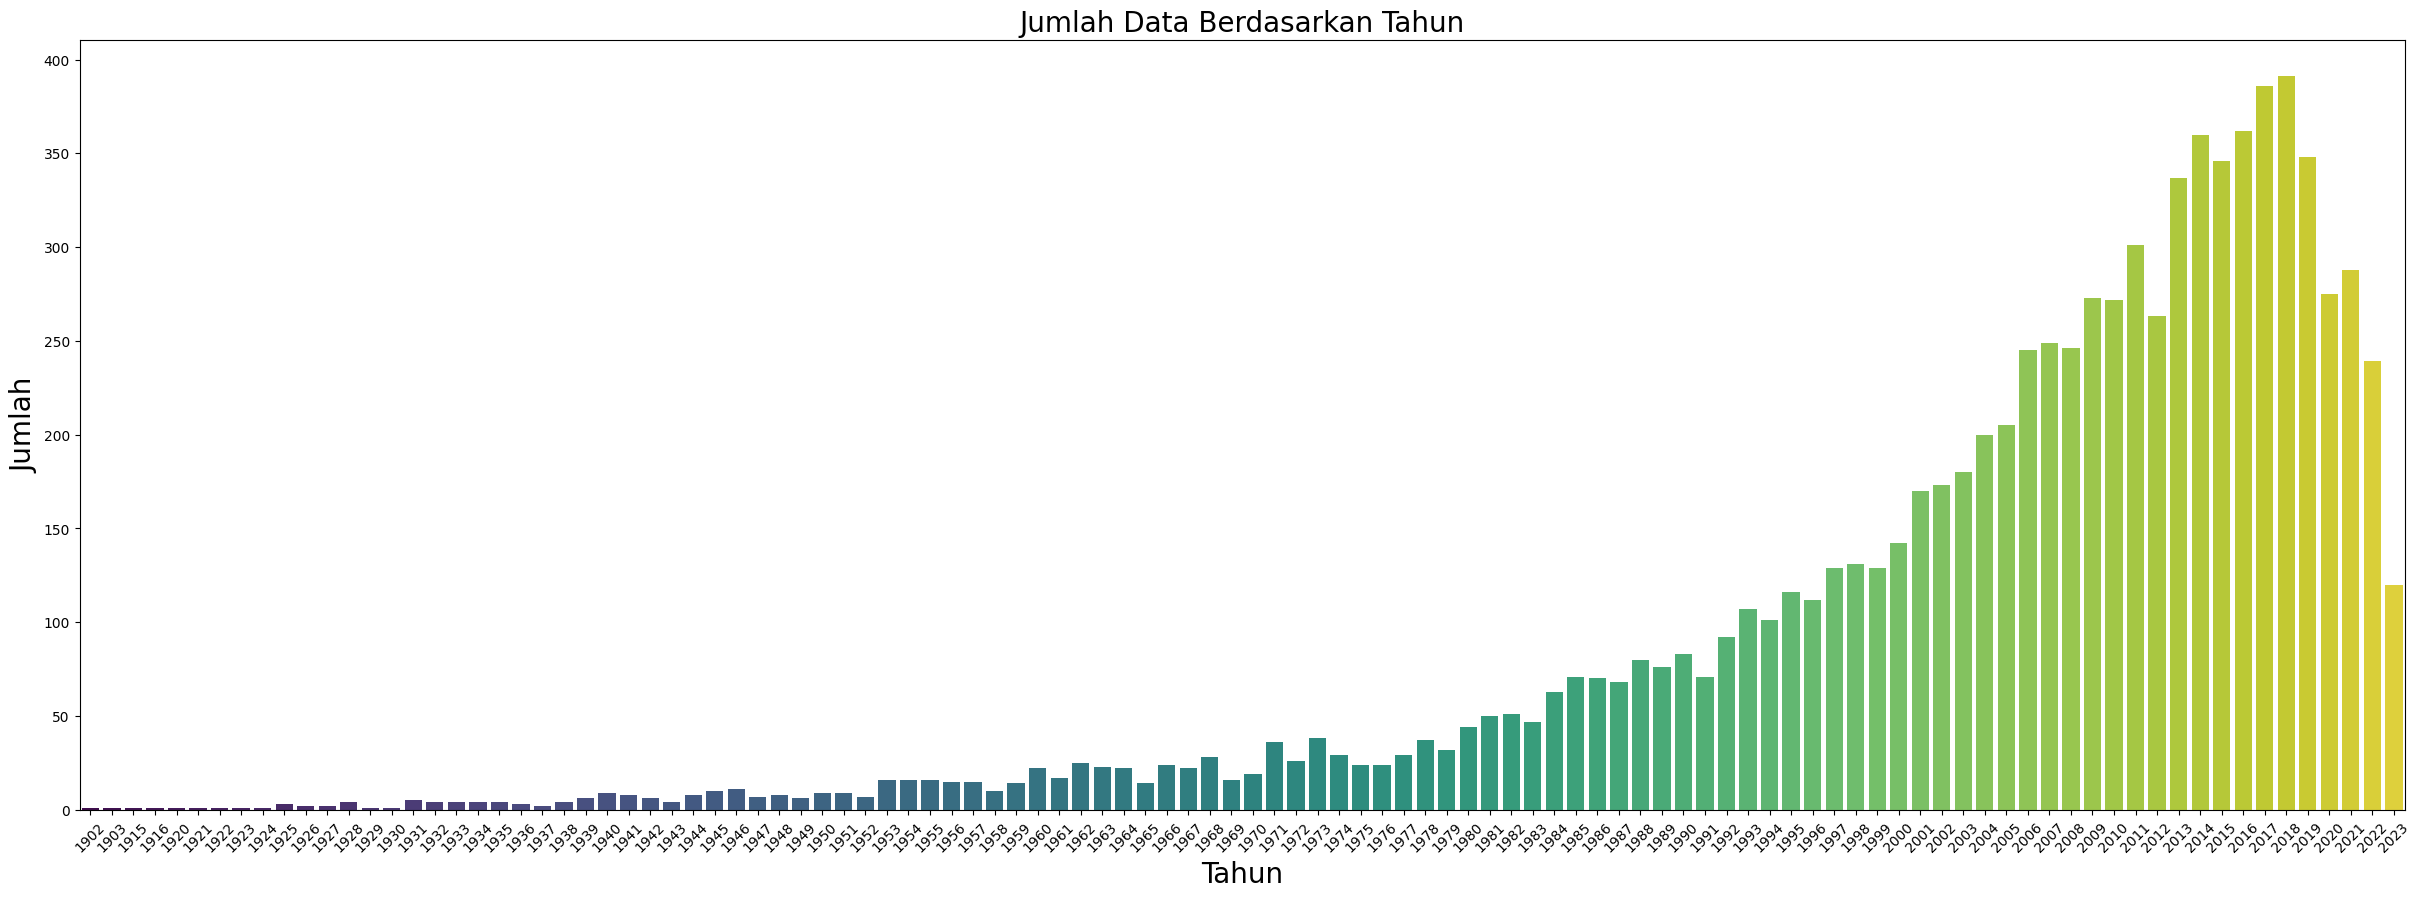

In [ ]:
# Hitung jumlah data untuk setiap tahun
year_counts = df['release_year'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(30, 10))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Jumlah Data Berdasarkan Tahun", fontsize=20)
plt.xlabel("Tahun", fontsize=20)
plt.ylabel("Jumlah", fontsize=20)
plt.xticks(rotation=45)
plt.show()

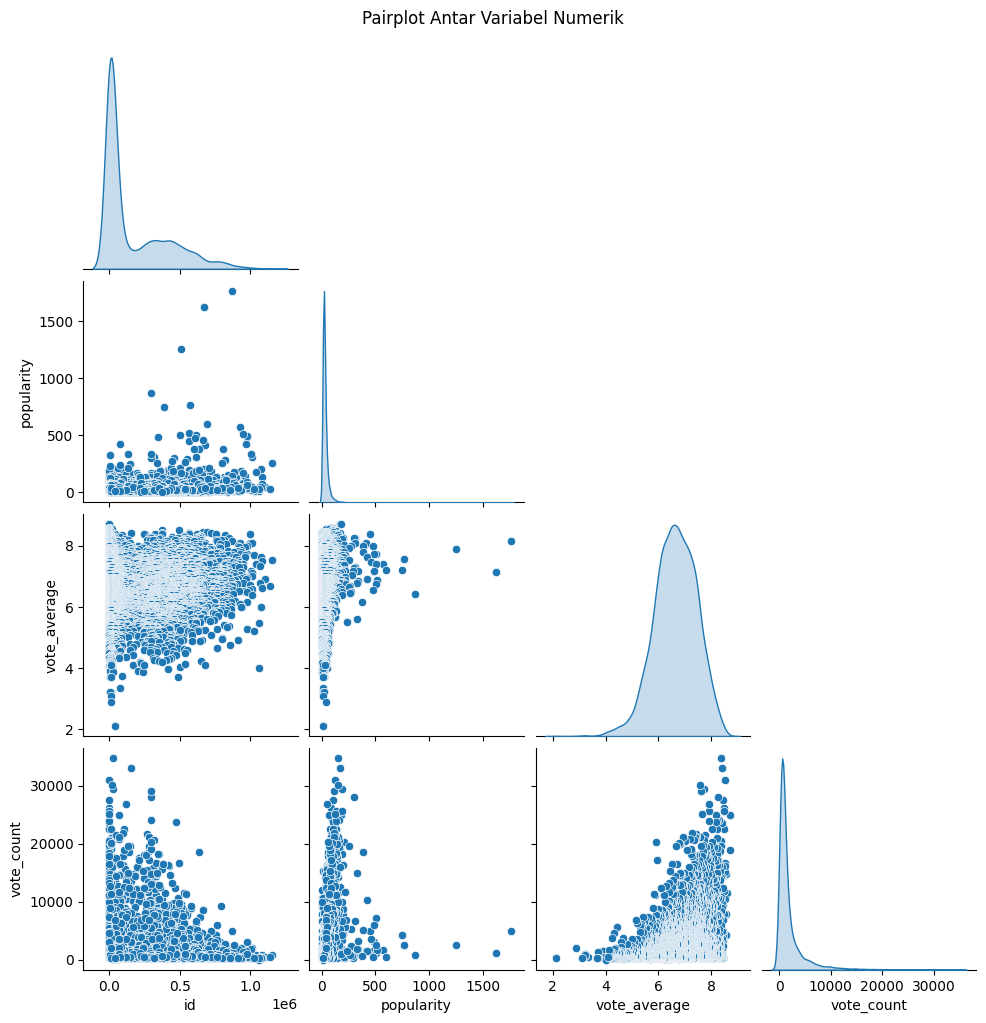

In [ ]:
# Membuat pairplot untuk kolom numerik
sns.pairplot(numerical_columns, diag_kind='kde', corner=True)
plt.suptitle('Pairplot Antar Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus atau Menangani Data Kosong (Missing Values)

In [ ]:
#mengganti value kosong pada kolom dengan mean
def replace_null_with_mean(column):
    # Hitung mean dengan mengabaikan 0 dan NaN
    mean_value = column[column != 0].dropna().mean()
    # Ganti nilai 0 dan NaN dengan mean
    return column.replace(np.nan).fillna(mean_value)

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = replace_null_with_mean(df[col])
    else:
        print(f"Kolom '{col}' bukan tipe numerik, dilewati.")

cek_nilai_kosong(df)

Kolom 'title' bukan tipe numerik, dilewati.
Kolom 'overview' bukan tipe numerik, dilewati.
Kolom 'release_date' bukan tipe numerik, dilewati.
Kolom 'release_year' bukan tipe numerik, dilewati.
Kolom 'id' memiliki 0 nilai kosong.
Kolom 'title' memiliki 0 nilai kosong.
Kolom 'overview' memiliki 1 nilai kosong.
Kolom 'popularity' memiliki 0 nilai kosong.
Kolom 'release_date' memiliki 0 nilai kosong.
Kolom 'vote_average' memiliki 0 nilai kosong.
Kolom 'vote_count' memiliki 0 nilai kosong.
Kolom 'release_year' memiliki 0 nilai kosong.


<ipython-input-196-a2ef67d4b43b>:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  return column.replace(np.nan).fillna(mean_value)


## Menghapus Data Duplikat

In [ ]:
# Mengecek duplikat
duplikat = df[df.duplicated()]

print("Data duplikat:")
print(duplikat)

Data duplikat:
Empty DataFrame
Columns: [id, title, overview, popularity, release_date, vote_average, vote_count, release_year]
Index: []


## Deteksi dan Penanganan Outlier

In [ ]:
# Hitung z-score untuk setiap kolom numerik
z_scores = np.abs(zscore(df.select_dtypes(include=['int64', 'float64'])))
# Threshold z-score > 3 dianggap outlier
outlier_indices = np.where(z_scores > 2)

# Menampilkan hasil
print("Indeks dan kolom dengan outlier (Z-Score > 3):")
for i, col in zip(outlier_indices[0], outlier_indices[1]):
    print(f"Baris: {i}, Kolom: {df.columns[col]}, Nilai: {df.iloc[i, col]}")

Indeks dan kolom dengan outlier (Z-Score > 3):
Baris: 0, Kolom: overview, Nilai: In 18th-century Romania, after spending much of her life in a traveling circus, human-vampire hybrid Rayne escapes and plots to take down her father, Kagan, the evil vampire king. When she's discovered by three vampire hunters, she manages to convince them to spare her life and join her cause. But slaying a vampire as powerful as Kagan will be no easy task.
Baris: 1, Kolom: overview, Nilai: After capturing Claw, all the criminals have gone into hiding until, Claw escapes! Gadget thinks he will get the case, but everyone else has other planes. A new version of the Gadget project is unveiled in the form of G2. Strict orders are given for Gadget to stay away from G2 and every crime scene, but Gadget feels he is needed more than anyone.
Baris: 2, Kolom: overview, Nilai: Stuck in the corridors of time, Godefroy de Montmirail and his faithful servant Jacquouille are projected to a time of profound political and 

In [ ]:
# Menggabungkan semua indeks baris outlier
outlier_rows = np.unique(outlier_indices[0])

# Menghapus baris yang termasuk dalam outlier_rows
df = df.drop(index=outlier_rows)
X = df.drop(columns=['id','title','overview','release_date'], errors='ignore')

## Encoding Data Kategorikal

In [ ]:
# Buat encoder
label_encoders = {}
features = ['popularity','vote_average','vote_count','release_year']
X = df.drop(columns=['id','title','overview','release_date'], errors='ignore')
# Loop untuk encode semua kolom kategorikal
for column in X.select_dtypes(include=['object']):
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Simpan encoder untuk referensi nanti

# Untuk mengakses kembali mapping dari Label Encoding
for column, le in label_encoders.items():
    print(f"\nMapping untuk kolom '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("Dataset setelah Label Encoding:")
X.head()


Mapping untuk kolom 'release_year': {1902: 0, 1903: 1, 1915: 2, 1916: 3, 1920: 4, 1921: 5, 1922: 6, 1923: 7, 1924: 8, 1925: 9, 1926: 10, 1927: 11, 1928: 12, 1929: 13, 1930: 14, 1931: 15, 1932: 16, 1933: 17, 1934: 18, 1935: 19, 1936: 20, 1937: 21, 1938: 22, 1939: 23, 1940: 24, 1941: 25, 1942: 26, 1943: 27, 1944: 28, 1945: 29, 1946: 30, 1947: 31, 1948: 32, 1949: 33, 1950: 34, 1951: 35, 1952: 36, 1953: 37, 1954: 38, 1955: 39, 1956: 40, 1957: 41, 1958: 42, 1959: 43, 1960: 44, 1961: 45, 1962: 46, 1963: 47, 1964: 48, 1965: 49, 1966: 50, 1967: 51, 1968: 52, 1969: 53, 1970: 54, 1971: 55, 1972: 56, 1973: 57, 1974: 58, 1975: 59, 1976: 60, 1977: 61, 1978: 62, 1979: 63, 1980: 64, 1981: 65, 1982: 66, 1983: 67, 1984: 68, 1985: 69, 1986: 70, 1987: 71, 1988: 72, 1989: 73, 1990: 74, 1991: 75, 1992: 76, 1993: 77, 1994: 78, 1995: 79, 1996: 80, 1997: 81, 1998: 82, 1999: 83, 2000: 84, 2001: 85, 2002: 86, 2003: 87, 2004: 88, 2005: 89, 2006: 90, 2007: 91, 2008: 92, 2009: 93, 2010: 94, 2011: 95, 2012: 96, 20

,popularity,vote_average,vote_count,release_year
20,17.286,8.133,1697,44
21,15.595,8.132,413,89
23,32.055,8.131,5176,48
24,18.228,8.131,1490,41
25,21.317,8.125,1407,34


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#K-Means Clustering**
# Tentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
df['cluster'] = kmeans.fit_predict(X)
labels = kmeans.fit_predict(X)

#Tampilkan Data dengan Cluster**
print("DataFrame dengan hasil clustering:")
df.head()

DataFrame dengan hasil clustering:


,id,title,overview,popularity,release_date,vote_average,vote_count,release_year,cluster
20,439,La Dolce Vita,Episodic journey of journalist Marcello who st...,17.286,1960-02-05,8.133,1697,1960,2
21,20941,Innocent Voices,"A young boy, in an effort to have a normal chi...",15.595,2005-01-28,8.132,413,2005,2
23,935,Dr. Strangelove or: How I Learned to Stop Worr...,After the insane General Jack D. Ripper initia...,32.055,1964-01-29,8.131,5176,1964,1
24,614,Wild Strawberries,Crotchety retired doctor Isak Borg travels fro...,18.228,1957-12-26,8.131,1490,1957,2
25,705,All About Eve,From the moment she glimpses her idol at the s...,21.317,1950-11-09,8.125,1407,1950,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Menghitung Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score untuk K-Means: {sil_score:.2f}")

Silhouette Score untuk K-Means: 0.70


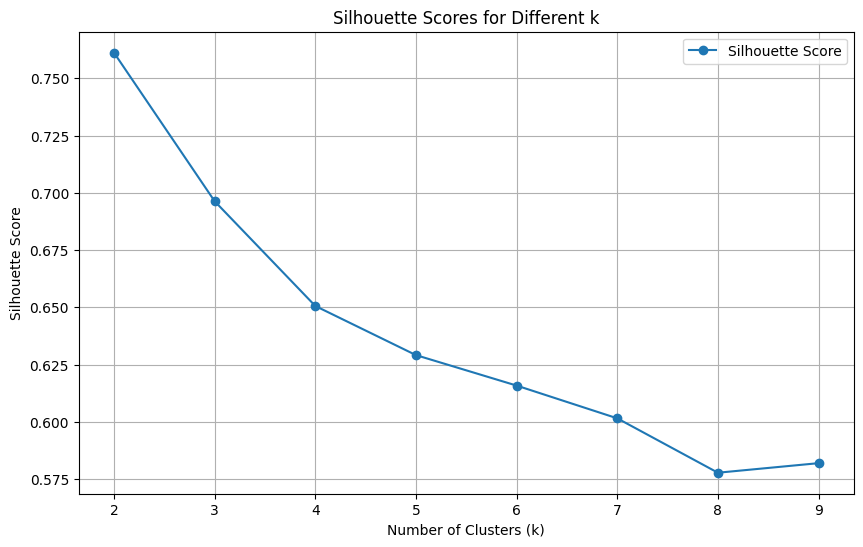

Optimal number of clusters using Silhouette Score: 2


In [ ]:
silhouette_scores = []
K = range(2, 10)  # Number of clusters to test

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

#Silhouette Score**
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'o-', label='Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

#Print Results**
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"Optimal number of clusters using Silhouette Score: {optimal_k_silhouette}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

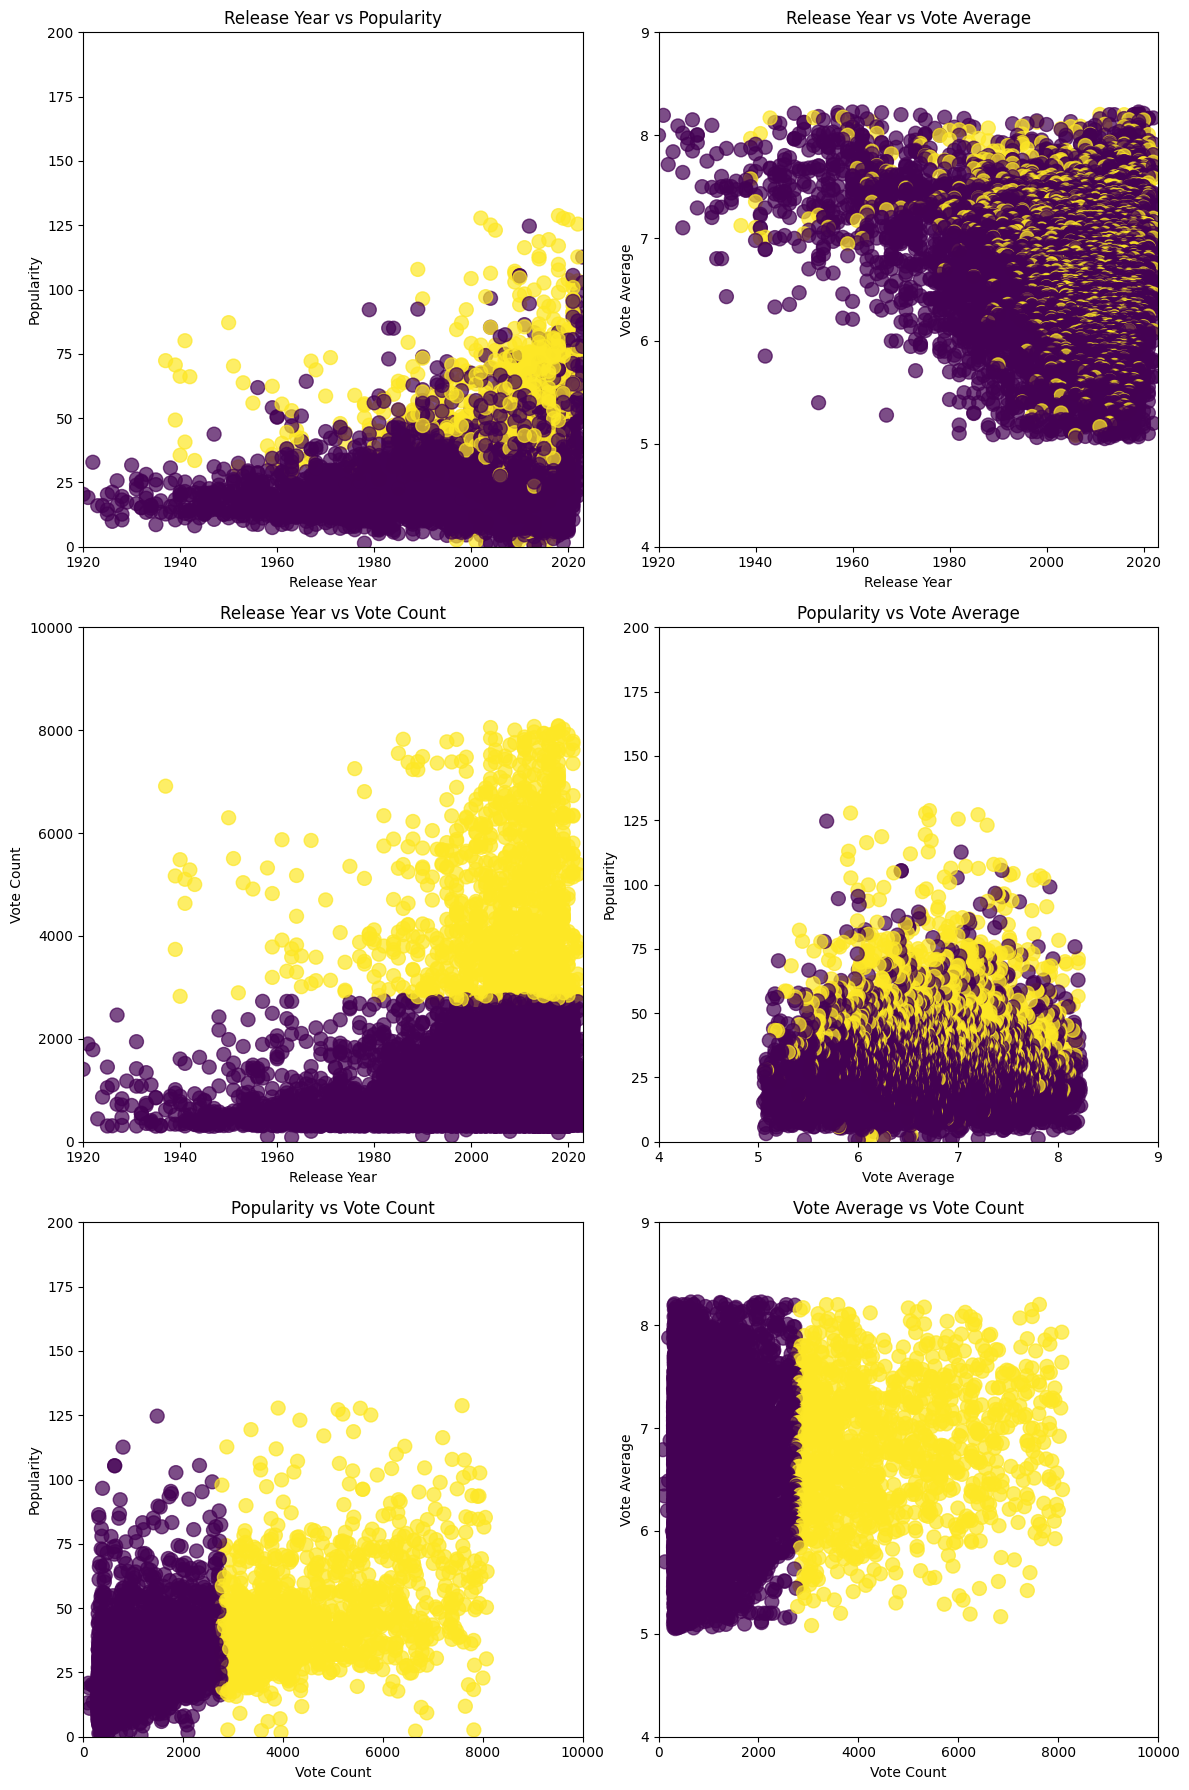

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
labels = kmeans.fit_predict(X)
df['cluster'] = kmeans.fit_predict(X)


# Plot scatter untuk setiap pasangan fitur
plt.figure(figsize=(12, 18))

# Scatter Plot 1: X = release_year, Y = popularity
plt.subplot(3, 2, 1)
plt.scatter(df['release_year'], df['popularity'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(1920, 2023)
plt.ylim(0, 200)
plt.title("Release Year vs Popularity")
plt.xlabel("Release Year")
plt.ylabel("Popularity")

# Scatter Plot 2: X = release_year, Y = vote_average
plt.subplot(3, 2, 2)
plt.scatter(df['release_year'], df['vote_average'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(1920, 2023)
plt.ylim(4, 9)
plt.title("Release Year vs Vote Average")
plt.xlabel("Release Year")
plt.ylabel("Vote Average")

# Scatter Plot 3: X = release_year, Y = vote_count
plt.subplot(3, 2, 3)
plt.scatter(df['release_year'], df['vote_count'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(1920, 2023)
plt.ylim(0, 10000)
plt.title("Release Year vs Vote Count")
plt.xlabel("Release Year")
plt.ylabel("Vote Count")

# Scatter Plot 4: X = popularity, Y = vote_average
plt.subplot(3, 2, 4)
plt.scatter(df['vote_average'], df['popularity'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(4, 9)
plt.ylim(0, 200)
plt.title("Popularity vs Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")

# Scatter Plot 5: X = popularity, Y = vote_count
plt.subplot(3, 2, 5)
plt.scatter(df['vote_count'],df['popularity'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(0, 10000)
plt.ylim(0, 200)
plt.title("Popularity vs Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Popularity")

# Scatter Plot 6:X = vote_count, Y = vote_average
plt.subplot(3, 2, 6)
plt.scatter(df['vote_count'], df['vote_average'], c=df['cluster'], cmap='viridis', alpha=0.7, s=100)
plt.xlim(0, 10000)
plt.ylim(4, 9)
plt.title("Vote Average vs Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Vote Average")

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

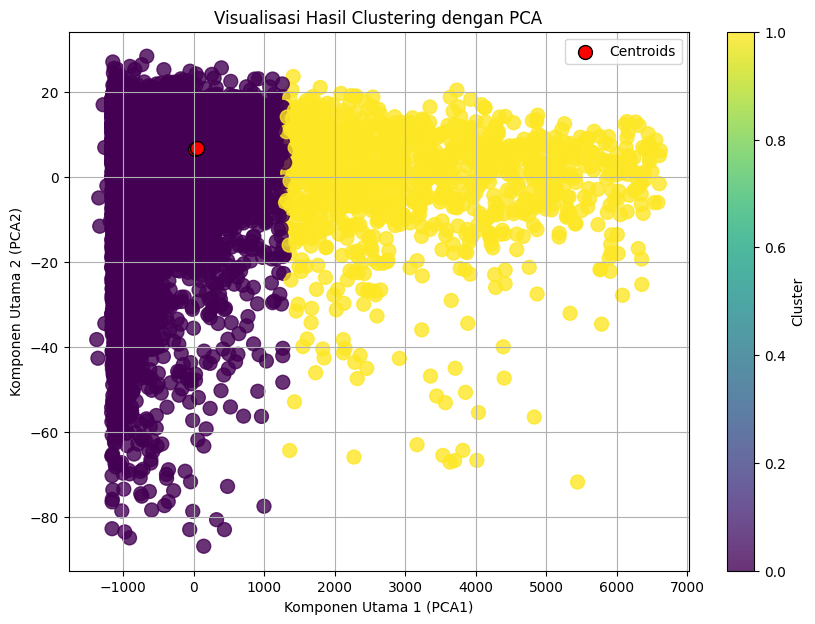

In [ ]:
#Reduksi Dimensi dengan PCA (Proyeksi ke 2D untuk Visualisasi)**
pca = PCA(n_components=2)  # Proyeksi ke 2 dimensi
X_pca = pca.fit_transform(X)

#Scatter Plot hasil clustering**
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=100, alpha=0.8)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', s=100, label='Centroids', edgecolor='black'
)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Komponen Utama 1 (PCA1)')
plt.ylabel('Komponen Utama 2 (PCA2)')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Menghitung Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score untuk K-Means: {sil_score:.2f}")

Silhouette Score untuk K-Means: 0.76


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Pisahkan data berdasarkan cluster menjadi dataframe baru
df_cluster_0 = df[df['cluster'] == 0].drop(columns='cluster')
df_cluster_1 = df[df['cluster'] == 1].drop(columns='cluster')

# Menampilkan dataframe untuk masing-masing cluster
print("Cluster 0 Data:")
print(df_cluster_0)
print("\nCluster 1 Data:")
print(df_cluster_1)

Cluster 0 Data:
          id                  title  \
20       439          La Dolce Vita   
21     20941        Innocent Voices   
24       614      Wild Strawberries   
25       705          All About Eve   
27       996       Double Indemnity   
...      ...                    ...   
8602  205724  Welcome to the Jungle   
8603   44918             Titanic II   
8604    3093       Basic Instinct 2   
8605  146227                Getaway   
8606  123229       Porn in the Hood   

                                               overview  popularity  \
20    Episodic journey of journalist Marcello who st...      17.286   
21    A young boy, in an effort to have a normal chi...      15.595   
24    Crotchety retired doctor Isak Borg travels fro...      18.228   
25    From the moment she glimpses her idol at the s...      21.317   
27    A rich woman and a calculating insurance agent...      22.766   
...                                                 ...         ...   
8602  A company re

### Cluster 1

In [ ]:
print(df_cluster_0.describe())

                  id   popularity  vote_average   vote_count
count    6484.000000  6484.000000   6484.000000  6484.000000
mean   144918.955429    23.310774      6.597629   909.163942
std    192765.417527    11.951649      0.694399   606.813011
min         5.000000     0.600000      5.051000    88.000000
25%     10121.000000    15.491000      6.088000   435.000000
50%     22499.000000    20.884000      6.590000   679.500000
75%    284334.000000    28.165500      7.115000  1225.000000
max    646389.000000   124.651000      8.226000  2763.000000


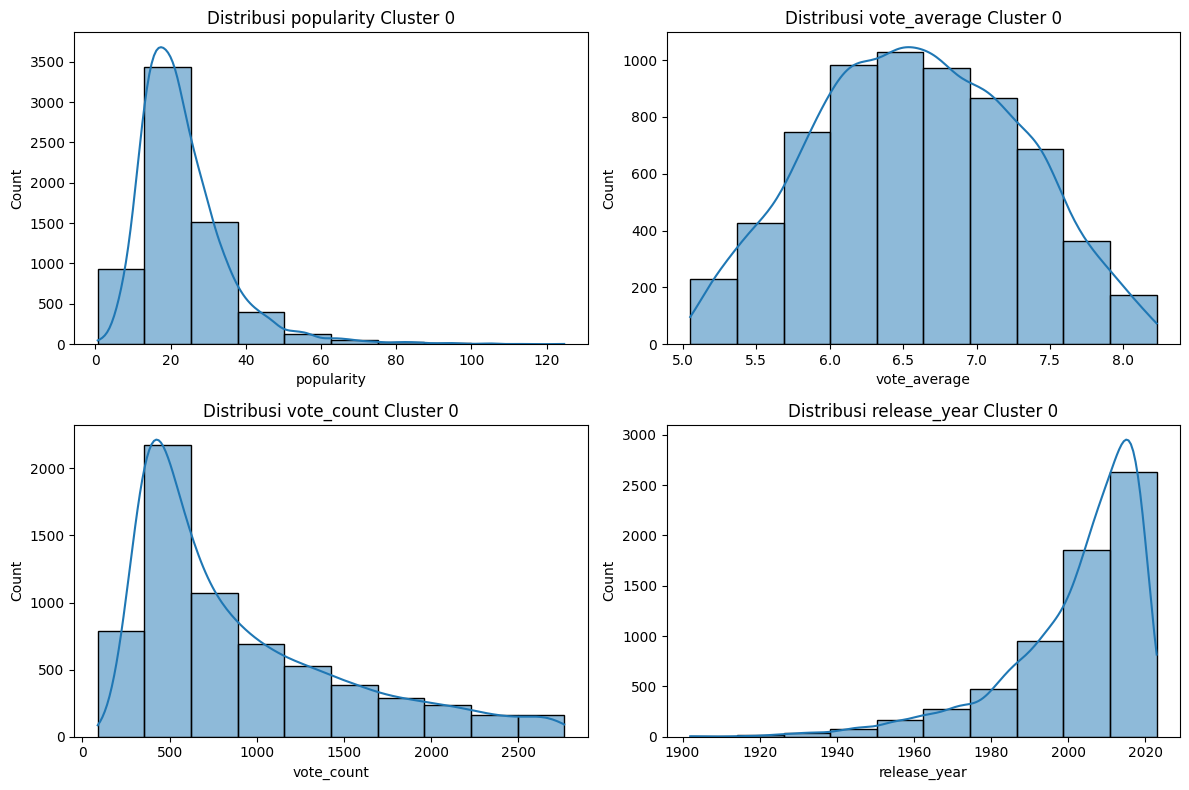

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_cluster_0[feature], kde=True, bins=10)
    plt.title(f'Distribusi {feature} Cluster 0')

plt.tight_layout()
plt.show()


### Cluster 2

In [ ]:
print(df_cluster_1.describe())

                  id   popularity  vote_average   vote_count
count    1145.000000  1145.000000   1145.000000  1145.000000
mean   131365.770306    47.072144      6.833334  4616.103057
std    174749.734657    20.219802      0.641684  1434.653052
min        15.000000     1.621000      5.081000  2764.000000
25%      4011.000000    32.744000      6.354000  3379.000000
50%     27576.000000    43.026000      6.835000  4216.000000
75%    260346.000000    56.530000      7.309000  5671.000000
max    646385.000000   128.738000      8.202000  8087.000000


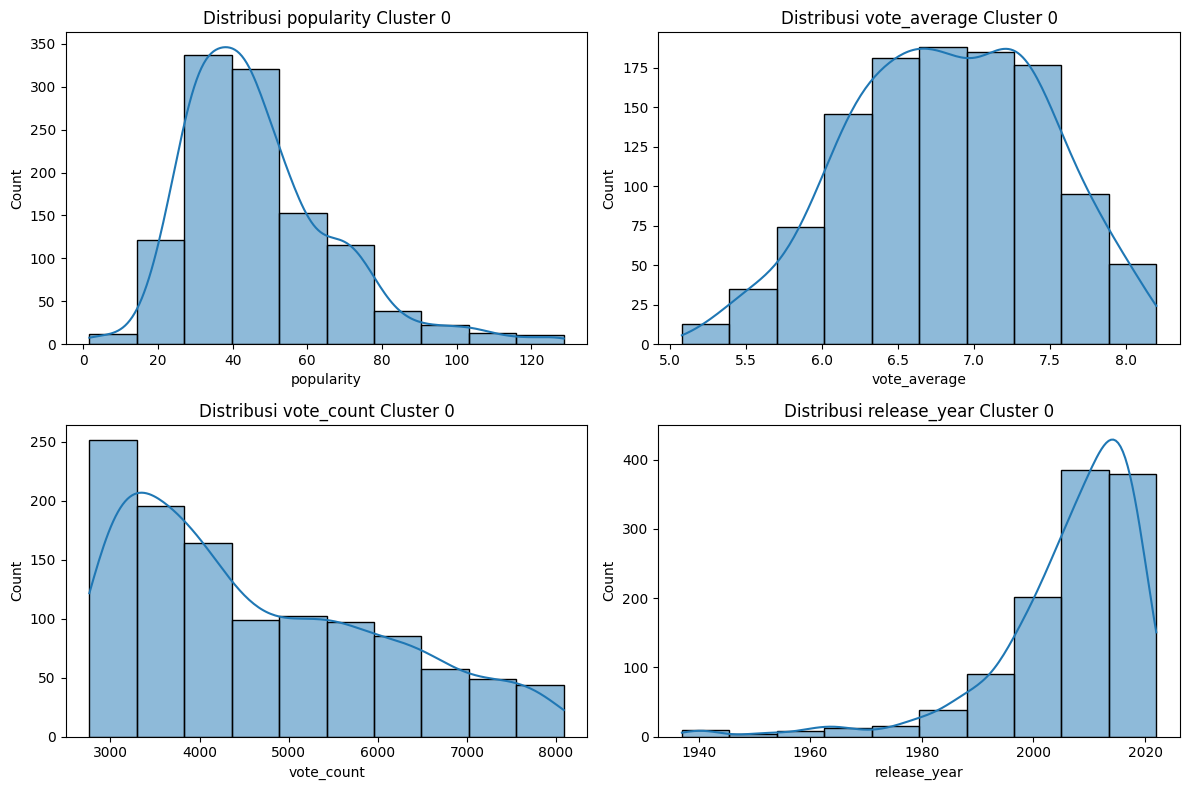

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_cluster_1
    [feature], kde=True, bins=10)
    plt.title(f'Distribusi {feature} Cluster 0')

plt.tight_layout()
plt.show()


##Tulis hasil interpretasinya di sini.
1. Cluster 1: berisikan film dengan tingkat popularitas yang rendah
dibuktikan dengan
*   jumlah film dengan popularitas rendah banyak pada cluster ini dengan nilai popularitas rata rata hanya 23 dan minimal 0.6
*   mempunyai rata rata rating rendah yaitu 6,5
*   memiliki jumlah vote rata rata 909 dan maksimum hanya 2763 saja
2. Cluster 2: berisikan film dengan tingkat popularitas yang tinggi
*   jumlah film dengan popularitas tinggi banyak pada cluster ini dengan nilai popularitas rata rata hanya 47 dan maksimal 128
*   mempunyai rata rata rating 6.8 dengan rating maksimal pada angka 8.2
*   mempunyai jumlah vote tinggi dengan rata rata 4616 dan maksimum 8087

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('clustering_film.csv', index=False)